In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder

In [23]:
#Loading the dataset
df = pd.read_csv("C:/Users/Dishita Shah/Desktop/Study/Projects/University Recommendation System/backend/university (1).csv")



In [24]:
# For better visuals
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [25]:
# If your dataset is in a DataFrame called df
print("First 5 rows of dataset:")
print(df.head())

print("\nSummary Statistics:")
print(df.describe(include='all'))

print("\nMissing Values:")
print(df.isnull().sum())


First 5 rows of dataset:
   Student_ID   GPA Preferred_Country       Course_Interest  Budget  \
0           1  9.83         Australia            Literature   46338   
1           2  6.77           Germany        Graphic Design   43627   
2           3  6.32               USA  Software Engineering   53025   
3           4  7.28               USA       Performing Arts   56756   
4           5  9.35         Australia             Fine Arts   52798   

   IELTS_GRE_Score          Recommended_University Chance_of_Admission  
0              268                      LMU Munich                 Low  
1              262               Monash University                 Low  
2              326            University of Oxford                 Low  
3              301  Australian National University              Medium  
4              291               McGill University              Medium  

Summary Statistics:
         Student_ID          GPA Preferred_Country Course_Interest  \
count   1200.000000

In [26]:
import warnings
warnings.filterwarnings('ignore')


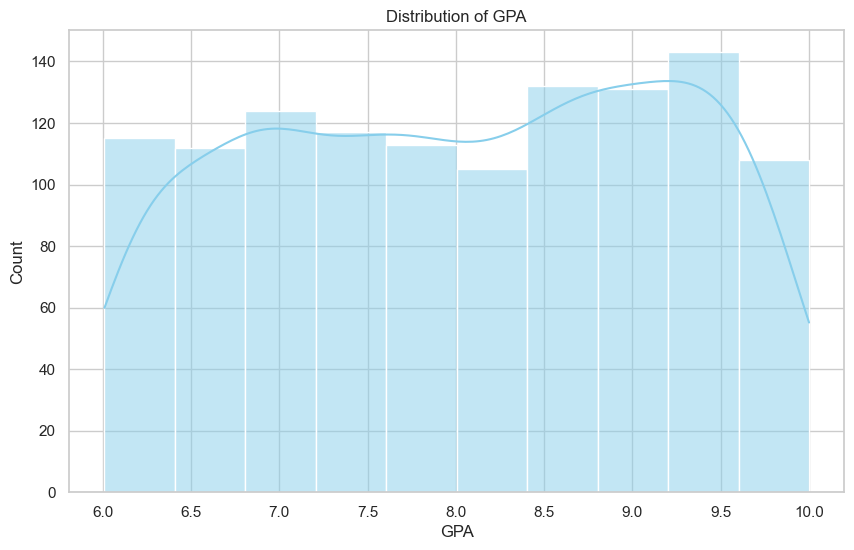

In [27]:
#distribution of GPA
sns.histplot(df['GPA'], kde=True, bins=10, color='skyblue')
plt.title("Distribution of GPA")
plt.xlabel("GPA")
plt.ylabel("Count")
plt.show()


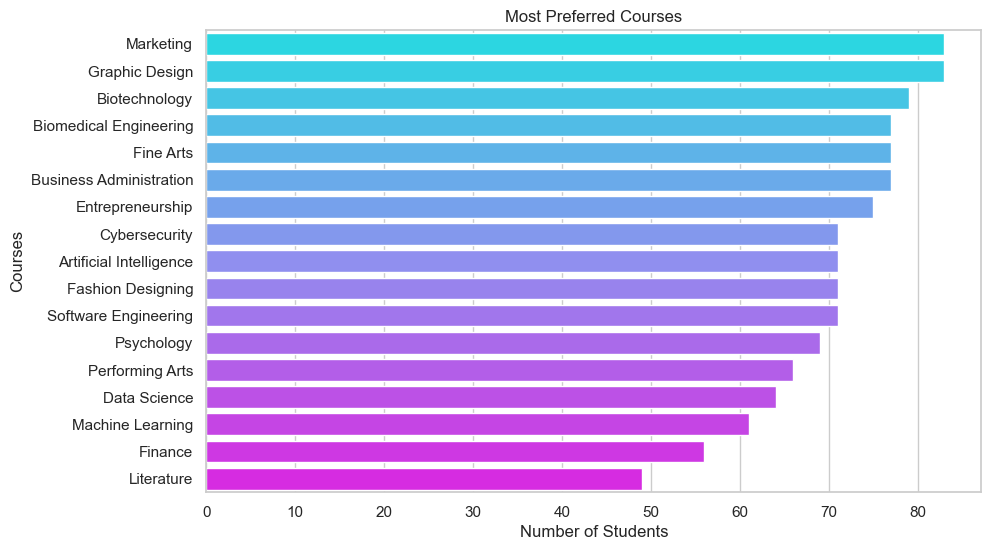

In [28]:
sns.countplot(y='Course_Interest', data=df, order=df['Course_Interest'].value_counts().index, palette='cool')
plt.title("Most Preferred Courses")
plt.xlabel("Number of Students")
plt.ylabel("Courses")
plt.show()


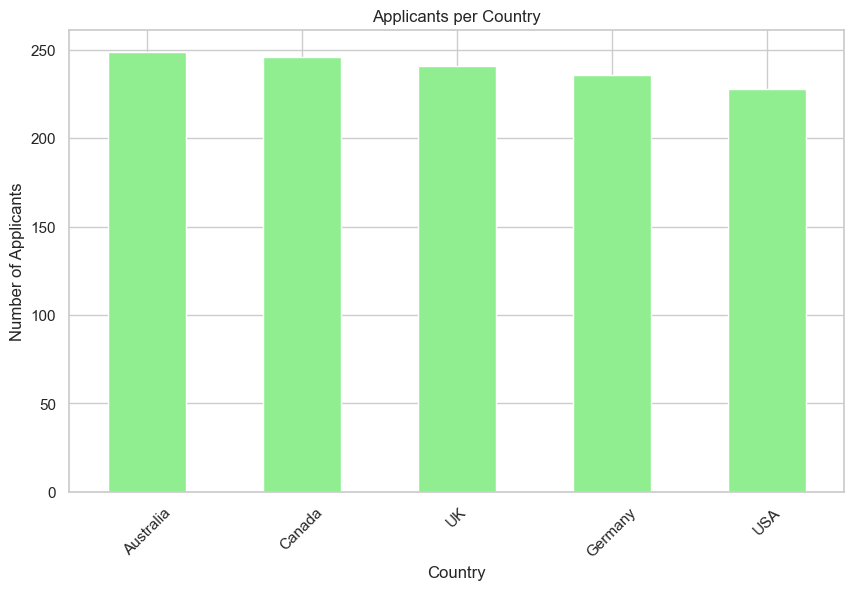

In [29]:
country_counts = df['Preferred_Country'].value_counts()
country_counts.plot(kind='bar', color='lightgreen')
plt.title("Applicants per Country")
plt.xlabel("Country")
plt.ylabel("Number of Applicants")
plt.xticks(rotation=45)
plt.show()


In [30]:
# 🔧 Add University to Country mapping (example dictionary – expand as needed)
university_country_map = {
    'Harvard University': 'USA',
    'MIT': 'USA',
    'University of Oxford': 'UK',
    'University of Cambridge': 'UK',
    'University of Toronto': 'Canada',
    'University of Melbourne': 'Australia',
    'ETH Zurich': 'Switzerland',
    'McGill University': 'Canada',
    'University of Sydney': 'Australia',
    'Carnegie Mellon University': 'USA',
    'LMU Munich': 'Germany',
    'Technical University of Munich': 'Germany',
    'University of Waterloo': 'Canada',
    'Columbia University': 'USA',
    'University of British Columbia': 'Canada',
    'Monash University': 'Australia',
    'Imperial College London': 'UK',
    'Australian National University': 'Australia',
    'University of California, Berkeley': 'USA'
}


In [31]:
# Add new column: country of recommended university
df['University_Country'] = df['Recommended_University'].map(university_country_map)



In [32]:
# Encode course and country for model
le_course = LabelEncoder()
le_country = LabelEncoder()

df['Course_Encoded'] = le_course.fit_transform(df['Course_Interest'])
df['Country_Encoded'] = le_country.fit_transform(df['Preferred_Country'])




In [33]:
# Features used for KNN
features = df[['GPA', 'IELTS_GRE_Score', 'Course_Encoded', 'Country_Encoded']]



In [34]:
# Train KNN
knn = NearestNeighbors(n_neighbors=3)
knn.fit(features)



NearestNeighbors(n_neighbors=3)

In [35]:
#taking user input
name = input("Enter your name: ")
gpa = float(input("Enter your GPA: "))
ielts_score = float(input("Enter your IELTS/GRE combined score: "))
course = input("Enter your course of interest: ")
country = input("Enter your preferred country: ")

# Encoding user input to numbers
course_encoded = le_course.transform([course])[0]
country_encoded = le_country.transform([country])[0]

user_vector = pd.DataFrame([[gpa, ielts_score, course_encoded, country_encoded]],
                           columns=['GPA', 'IELTS_GRE_Score', 'Course_Encoded', 'Country_Encoded'])

#KNN
_, indices = knn.kneighbors(user_vector)
top_universities = df.iloc[indices[0]]['Recommended_University'].values
top_countries = df.iloc[indices[0]]['University_Country'].values

#displaying results
print(f"\nHi {name}👋")
print("Based on your profile, your Top 3 university recommendations are🎉:\n")

for i, uni in enumerate(top_universities):
    print(f"{i+1}. {uni} ({top_countries[i]})")

print("\n         Good Luck!👍      ")

# ⚠️ Check if any are in the preferred country
if not any(c == country for c in top_countries):
    print(f"\n⚠️ Note: These universities are not in your preferred country ({country}).")
    print("But they are the best suited for your course, GPA, and IELTS/GRE score.")

Enter your name:  Dishita
Enter your GPA:  8.61
Enter your IELTS/GRE combined score:  267
Enter your course of interest:  Marketing
Enter your preferred country:  UK



Hi Dishita👋
Based on your profile, your Top 3 university recommendations are🎉:

1. Imperial College London (UK)
2. Imperial College London (UK)
3. University of Oxford (UK)

         Good Luck!👍      


In [36]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.
